In [1]:
# Common imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Level 1

In [2]:
# Read in level1 image and check size
img1 = cv2.imread("data/Level1.png")
print(img1.shape)

(177, 177, 3)


In [3]:
# Check for grayscale pixel reperesenting character
print(img1[0, 0])

[67 67 67]


In [4]:
# Extract characters from the grayscale pixels at the top and print position of colon
h, w = img1.shape[:-1]
for i in range(h):
    if img1[i, 0, 0] != img1[i, 0, 1]:
        break
    for j in range(w):
        print(chr(int(img1[i, j, 0])), end='')
        if chr(int(img1[i, j, 0])) == ':':
            print('\n', i, j)
            break
    

Congrats on solving the first level of this task! You were able to figure out the ASCII text from the image, but wait! Your journey is not yet over. After the end of the text you will find a (200, 150, 3) coloured image. This image is a part of the bigger image called "zucky_elon.png". Find the top left coordinate (Image convention) from where this image was taken. The x coordinate represents the colour of a monochrome maze hidden in an image with coloured noise. Find the maze and solve the maze using any algothrim like dfs but better. Try comparing them and seeing how they perform like A*, RRT, RRT* for example. Once the maze is solved you will see a word. This word is a password to a password protected zip file which contains a png. Note that the password is case sensitive and all the aplhabets in the password will be capital letters This is your treasure. To open the treasure you need to convert the image in to an audio file in a simple way like you did for this ASCII text. Once con

# Level 2

In [5]:
# Extract the pixels after the colon and reshape, disregarding the padding at the bottom
temp = img1[6, 94:, :]
needle = np.append(temp, img1[7:, :, :].reshape(-1, 3), axis=0)
needle = needle[:30000].reshape((200, 150, 3))

print(needle.shape)

(200, 150, 3)


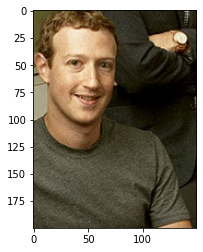

In [6]:
# Visualize the generated image
plt.imshow(cv2.cvtColor(needle, cv2.COLOR_BGR2RGB))

In [7]:
# Read in zucky_elon.png
haystack = cv2.imread('data/zucky_elon.png')

In [8]:
# Use template matching to find coordinate of needle in haystack
img = haystack.copy()
method = cv2.TM_CCOEFF
h, w = needle.shape[:-1]

# Apply template Matching
res = cv2.matchTemplate(img, needle, method)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

top_left = max_loc
print(max_loc)

(230, 460)


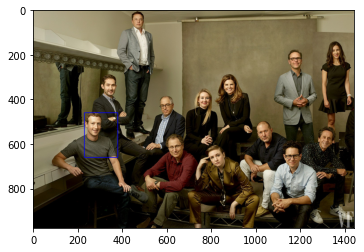

In [9]:
# Visualize the matched template
bottom_right = (top_left[0] + w, top_left[1] + h)
cv2.rectangle(img, top_left, bottom_right, 255, 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Level 3: Exploration

In [10]:
# Read in the maze
maze = cv2.imread('data/maze_lv3.png')
print(maze.shape)

(180, 457, 3)


In [11]:
# X coordinate represents the color, use it to create a mask
color = 230

mask = maze[:, :, 0] != color

In [12]:
# Use the mask to identify path and obstacle pixels
maze2 = maze.copy()
maze2[mask] = [0, 0, 0]
maze2[~mask] = [255, 255, 255]

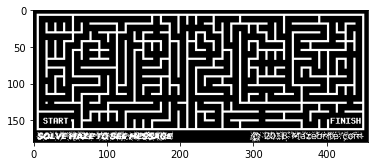

In [13]:
# Visualize the created maze
maze3 = maze2[:, :, 0]
plt.imshow(maze3, cmap='gray')

In [14]:
# Test if chosen start and end points are valid (0 if pathway, 255 if obstacle)
print(maze3[150, 20], maze3[160, 430])

0 0


In [15]:
# Suitable start and end points 
start = np.array([150, 20])
end = np.array([160, 430])

## Level 3 solved using level3.py

Password = APPLE,
used it to extract Treasure.zip in the data directory.

# Level 4

In [16]:
# Load extracted image, print shape and first pixel
img4= cv2.imread("data/Treasure/treasure_mp3.png")
print(img4.shape)
print(img4[0, 0])

(390, 390, 3)
[73 73 73]


In [17]:
# Take the value of each pixel and flatten into a 1D array
s = img4[:, :, 0].flatten()
print(s)

[73 68 51 ...  0  0  0]


In [18]:
# Print size of s and some characters from the start
print(s.size)
print([chr(x) for x in s[:100]])

152100
['I', 'D', '3', '\x04', '\x00', '\x00', '\x00', '\x00', '\x01', 'G', 'T', 'X', 'X', 'X', '\x00', '\x00', '\x00', '\x12', '\x00', '\x00', '\x03', 'm', 'a', 'j', 'o', 'r', '_', 'b', 'r', 'a', 'n', 'd', '\x00', 'd', 'a', 's', 'h', '\x00', 'T', 'X', 'X', 'X', '\x00', '\x00', '\x00', '\x11', '\x00', '\x00', '\x03', 'm', 'i', 'n', 'o', 'r', '_', 'v', 'e', 'r', 's', 'i', 'o', 'n', '\x00', '0', '\x00', 'T', 'X', 'X', 'X', '\x00', '\x00', '\x00', '\x1c', '\x00', '\x00', '\x03', 'c', 'o', 'm', 'p', 'a', 't', 'i', 'b', 'l', 'e', '_', 'b', 'r', 'a', 'n', 'd', 's', '\x00', 'i', 's', 'o', '6', 'm', 'p']


In [19]:
# Write out to an mp3 file
buffer = 10000
with open('out/treasure.mp3', 'wb') as f:
    for i in range(0, 152100 - buffer, buffer):
        f.write(bytes(s[i:i + buffer]))
        
    # Write out the remaining bytes
    f.write(bytes(s[i + buffer:]))